In [ ]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')
pyvista._wrappers['vtkPolyData'] = pyvista.PolyData

Creating a Uniform Grid
=======================

Create a simple uniform grid from a 3D NumPy array of values.


In [4]:
import pyvista as pv
import numpy as np

Take a 3D NumPy array of data values that holds some spatial data where
each axis corresponds to the XYZ cartesian axes. This example will
create a `pyvista.UniformGrid`{.interpreted-text role="class"} object
that will hold the spatial reference for a 3D grid which a 3D NumPy
array of values can be plotted against.


Create the 3D NumPy array of spatially referenced data. This is
spatially referenced such that the grid is 20 by 5 by 10 (nx by ny by
nz)


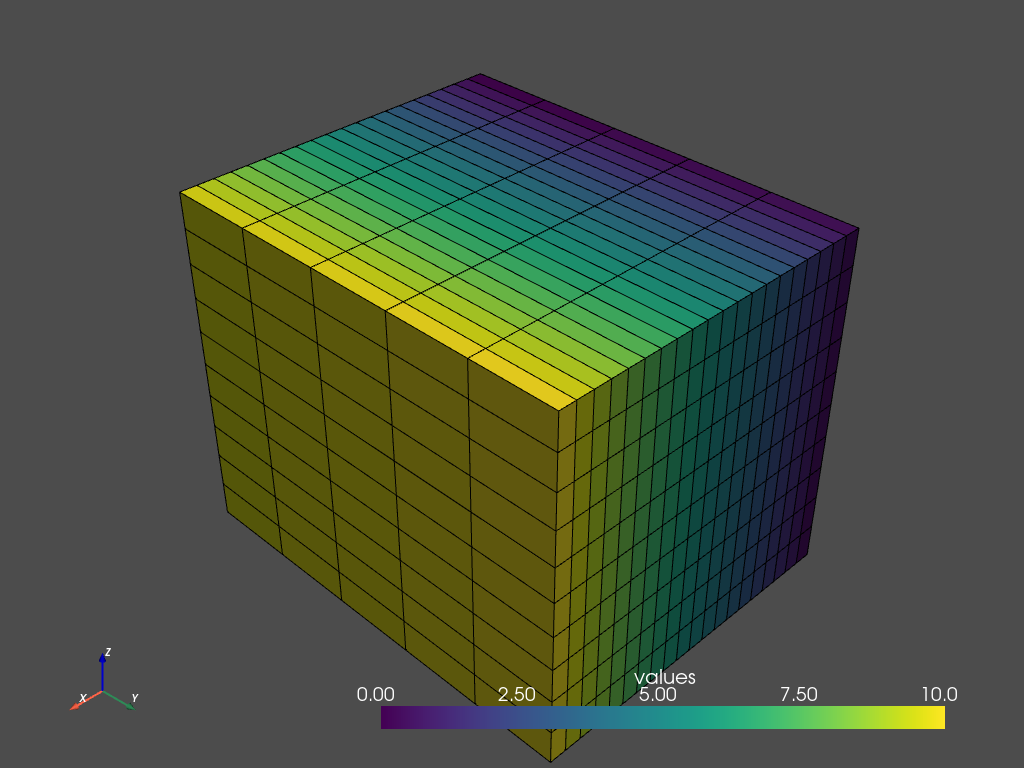

In [5]:
values = np.linspace(0, 10, 1000).reshape((20, 5, 10))
values.shape

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 5, 2)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = values.flatten(order="F")  # Flatten the array!

# Now plot the grid!
grid.plot(show_edges=True)

Don\'t like cell data? You could also add the NumPy array to the point
data of a `pyvista.UniformGrid`{.interpreted-text role="class"}. Take
note of the subtle difference when setting the grid dimensions upon
initialization.


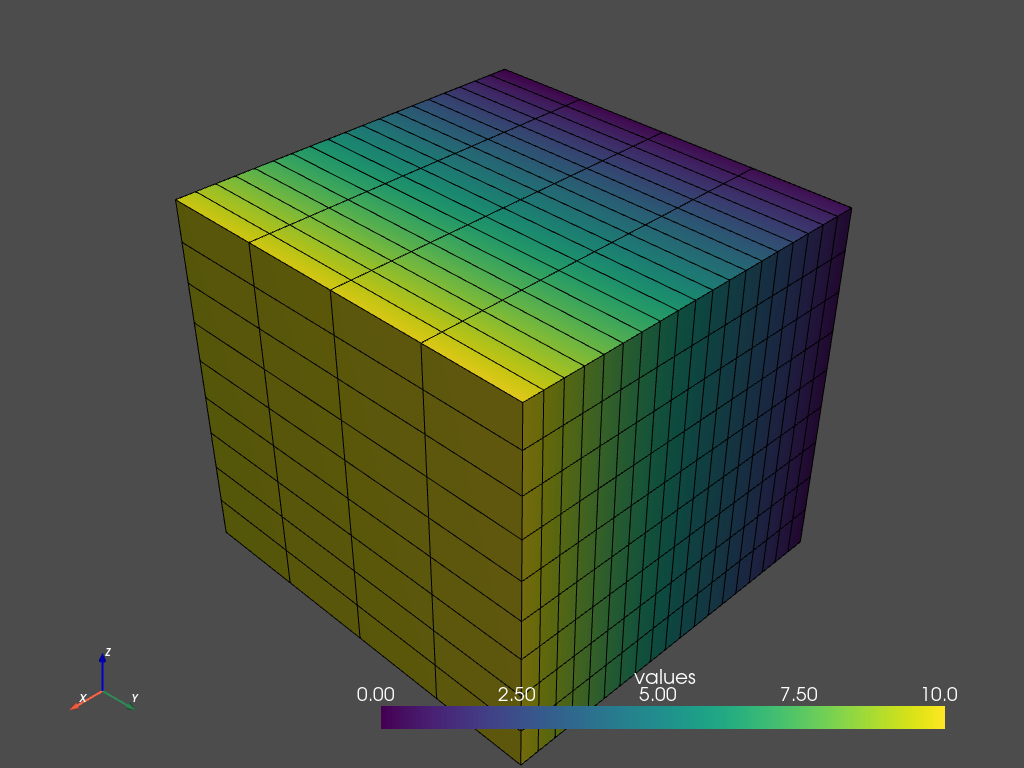

In [6]:
# Create the 3D NumPy array of spatially referenced data
# This is spatially referenced such that the grid is 20 by 5 by 10
#   (nx by ny by nz)
values = np.linspace(0, 10, 1000).reshape((20, 5, 10))
values.shape

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape because we want to inject our values on the
#   POINT data
grid.dimensions = values.shape

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 5, 2)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.point_data["values"] = values.flatten(order="F")  # Flatten the array!

# Now plot the grid!
grid.plot(show_edges=True)